<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_neural_networks_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


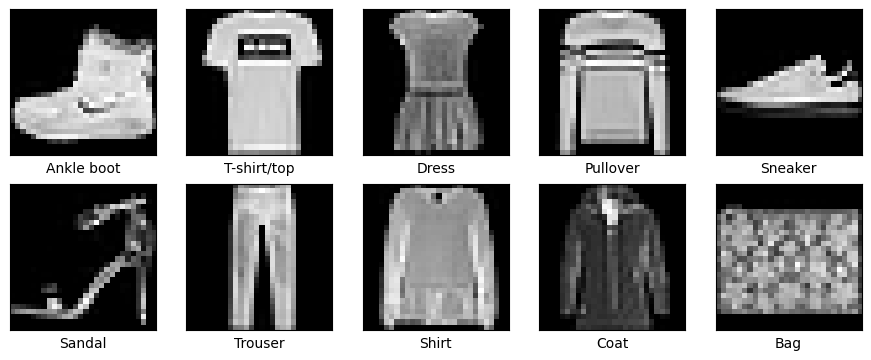

In [3]:
#visualize some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
selected = [0,1,3,5,6,8,16,18,19,23]
plt.figure(figsize=(11, 11))
for i, s in enumerate(selected):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #img = plt.imread(x_train[s])
    plt.imshow(x_train[s], cmap='gray')
    plt.xlabel(classes[y_train[s]],)

In [4]:
# normalize data
x_train = x_train.reshape(x_train.shape[0],-1)/255
x_test = x_test.reshape(x_test.shape[0],-1)/255

# Binary Classification

In [5]:
# select only t-shirts and ankle boots
shirt_train = np.where(y_train==0)
dress_train = np.where(y_train==3)

shirt_test = np.where(y_test==0)
dress_test = np.where(y_test==3)

In [6]:
# concatenate them
x_train_s = x_train[shirt_train]
y_train_s = y_train[shirt_train]

x_test_s = x_test[shirt_test]
y_test_s = y_test[shirt_test]

x_train_d = x_train[dress_train]
y_train_d = y_train[dress_train]

x_test_d = x_test[dress_test]
y_test_d = y_test[dress_test]

x_train_binary = np.concatenate([x_train_s, x_train_d])
x_test_binary = np.concatenate([x_test_s, x_test_d])

y_train_binary = np.concatenate([y_train_s, np.ones_like(y_train_d)])
y_test_binary = np.concatenate([y_test_s, np.ones_like(y_test_d)])

# Neural Network (Custom)

Compute the sigmoid function:
$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [7]:
def sigmoid(z):
    """
    Compute sigmoid function.
    z : the product theta.T * x + b
    Returns
    -------
    g : The sigmoid function.
    """
    # TO DO (Hint, check np.exp)
    a = 1./(1+np.exp(-z))
    # ======
    return a

$a = ReLU(z) = max(z,0)$

In [8]:
def relu(z):
    """
    Compute relu function.
    z : the product theta.T * x + b
    Returns
    -------
    a : The relu function.
    """
    # TO DO (Hint, check np.maximum)
    a = np.maximum(z,0)
    # ======
    return a

In [9]:
# check relu function
assert relu(-1) == 0
assert relu(2) == 2

In [11]:
def init_params(n_out,n_in):

    # set random seed to 0
    # Hint, check np.random.uniform
    np.random.seed(0)
    # init random params and multiply it with 0.1
    w = np.random.randn(n_out,n_in)*0.01
    b = np.random.randn(n_out)*0.01
    return w, b

In [14]:
# check init params
w, b  = init_params(2,3)
print(np.round(w,4) == np.array([[ 0.0176,  0.004 ,  0.0098],[ 0.0224,  0.0187, -0.0098]]))
print(np.round(b,4) == np.array([0.0095, -0.0015]))

[[ True  True  True]
 [ True  True  True]]
[ True  True]


Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [15]:
def costFunction(y, m, a):
    """
    Computes cost for linear regression.
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    J = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))


    return J

In [17]:
#forward pass
def forward(X, w, b, activation = 'relu'):
    z = np.dot(X,w.T) + b
    if activation=='relu':
        a = relu(z)
    else:
        a = sigmoid(z)
    return a

In [19]:
w, b  = init_params(3,2)
forward(np.asarray([[1,2],[3,4]]), w, b, 'relu')[0].shape

(3,)

\begin{split}ReLU'(z)= \begin{Bmatrix}1 & z>0 \\
0 & z<0 \end{Bmatrix}\end{split}

In [20]:
#relu gradient
def reluBackward(z):
    #TO DO
    z[z<=0] = 0
    z[z>0] = 1
    return z

Calculate the derivatives: $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)}-Y^{(i)})$$

In [21]:
#backpropagation
def backward(a, dz):
    m = len(a)
    # TO DO
    # dz is equal to A-Y for the final layer so you could use the above eq replacing
    dw = np.dot(a.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m

    return dw, db

$$ w_j := w_j - \alpha dw_j $$
$$ b := b - \alpha db $$

In [22]:
# update parameters for optimization
def update(w, b, dw, db):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

In [43]:
#forward pass
def dummy_neural(X, y, n_layer_1, epochs = 100):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course).
    # Layer 1 should have 200 neurons
    w1, b1 = init_params(n_layer_1,n_in)
    w2, b2 = init_params(n_out,n_layer_1)

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a2 = forward(a1, w2, b2, activation = 'sigmoid')

        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        dz1 = np.dot((dz2),w2)*reluBackward(np.dot(X,w1.T) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2.T, db2)
        w1, b1 = update(w1, b1, dw1.T, db1)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2

        if i%10==0:

            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [44]:
learning_rate = 0.01
a = dummy_neural(x_train_binary, y_train_binary.reshape(-1,1), 200, 1000)

epoch 0 with cost 0.6926843600933158
train: 0.58425
test: 0.6215
epoch 10 with cost 0.6909313821661296
train: 0.7553333333333333
test: 0.763
epoch 20 with cost 0.6892546162312052
train: 0.7985833333333333
test: 0.7905
epoch 30 with cost 0.6876313864468687
train: 0.8191666666666667
test: 0.8125
epoch 40 with cost 0.6860635926827817
train: 0.8356666666666667
test: 0.8245
epoch 50 with cost 0.6845669893479787
train: 0.8493333333333334
test: 0.84
epoch 60 with cost 0.6831150354480251
train: 0.8645
test: 0.852
epoch 70 with cost 0.6816818330484011
train: 0.8705
test: 0.8625
epoch 80 with cost 0.6802567595743643
train: 0.87525
test: 0.8685
epoch 90 with cost 0.6788345287565374
train: 0.8789166666666667
test: 0.871
epoch 100 with cost 0.6774113143395023
train: 0.8805
test: 0.8725
epoch 110 with cost 0.6759853580877065
train: 0.8821666666666667
test: 0.8715
epoch 120 with cost 0.6745514310763837
train: 0.8823333333333333
test: 0.87
epoch 130 with cost 0.6731048540994615
train: 0.88033333333333

In [45]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
print(np.mean(np.round(a2t.reshape(-1))==y_test_binary))
assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.869

0.869


# Neural Network Binary (Keras)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [48]:
batch_size = 128
epochs = 50

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8045 - loss: 0.5062 - val_accuracy: 0.8870 - val_loss: 0.3101
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8958 - loss: 0.2850 - val_accuracy: 0.8965 - val_loss: 0.2610
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9053 - loss: 0.2435 - val_accuracy: 0.9045 - val_loss: 0.2386
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9133 - loss: 0.2236 - val_accuracy: 0.9090 - val_loss: 0.2256
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9176 - loss: 0.2113 - val_accuracy: 0.9130 - val_loss: 0.2162
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2068 - val_accuracy: 0.9190 - val_loss: 0.2103
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.1960 - val_accuracy: 0.9210 - val_loss: 0.2052
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9218 - loss: 0.1923 - val_accuracy: 0.9230 - val_loss

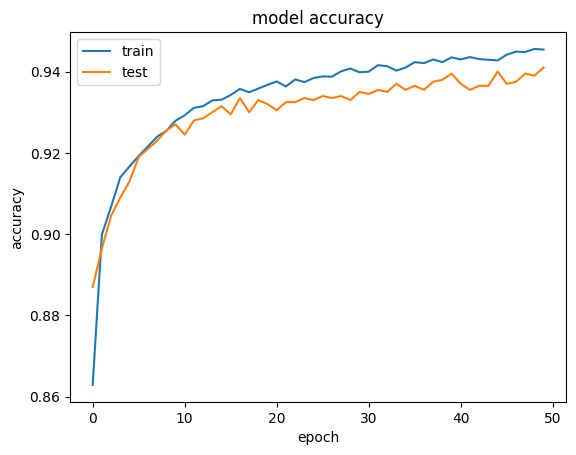

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

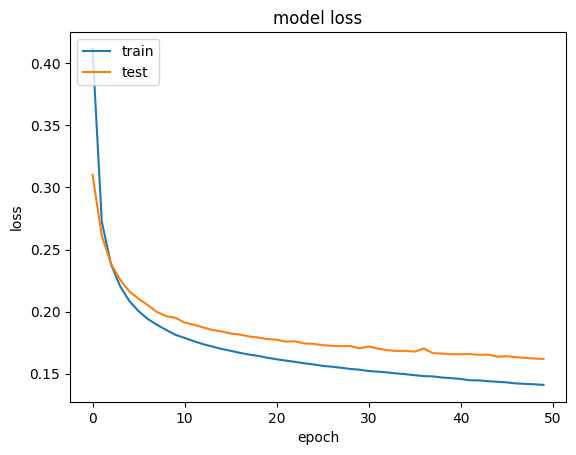

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural Network Multi-class (Keras) + enable GPU!

Enable GPU: Runtime->Change runtime type->Select GPU

TO DO!
Train a dense neural network using all the classes with 3 hidden layes (size $l_1$:500, $l_2$:200 and $l_3$:200) for 200 epochs.
Hints:
1. Change the final activation function
2. Change the loss function
3. Convert $y$ to one-hot matrix

QUESTION: What do you notice by seeing the validation loss/accuracy and the train loss/accuracy? If not just plot the results (loss, accuracy)

In [51]:
model = Sequential()
model.add(Dense(500, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

batch_size = 128
epochs = 200

Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)


model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(x_train, Y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, Y_test), verbose = 2)

Epoch 1/200
469/469 - 5s - 10ms/step - accuracy: 0.6854 - loss: 1.0140 - val_accuracy: 0.7578 - val_loss: 0.6936
Epoch 2/200
469/469 - 2s - 5ms/step - accuracy: 0.7998 - loss: 0.5982 - val_accuracy: 0.7954 - val_loss: 0.5777
Epoch 3/200
469/469 - 1s - 3ms/step - accuracy: 0.8217 - loss: 0.5204 - val_accuracy: 0.8096 - val_loss: 0.5358
Epoch 4/200
469/469 - 1s - 3ms/step - accuracy: 0.8327 - loss: 0.4844 - val_accuracy: 0.8251 - val_loss: 0.5049
Epoch 5/200
469/469 - 2s - 5ms/step - accuracy: 0.8403 - loss: 0.4590 - val_accuracy: 0.8211 - val_loss: 0.5197
Epoch 6/200
469/469 - 1s - 3ms/step - accuracy: 0.8453 - loss: 0.4431 - val_accuracy: 0.8388 - val_loss: 0.4588
Epoch 7/200
469/469 - 1s - 3ms/step - accuracy: 0.8495 - loss: 0.4312 - val_accuracy: 0.8417 - val_loss: 0.4482
Epoch 8/200
469/469 - 2s - 3ms/step - accuracy: 0.8552 - loss: 0.4157 - val_accuracy: 0.8379 - val_loss: 0.4569
Epoch 9/200
469/469 - 2s - 5ms/step - accuracy: 0.8590 - loss: 0.4054 - val_accuracy: 0.8463 - val_loss

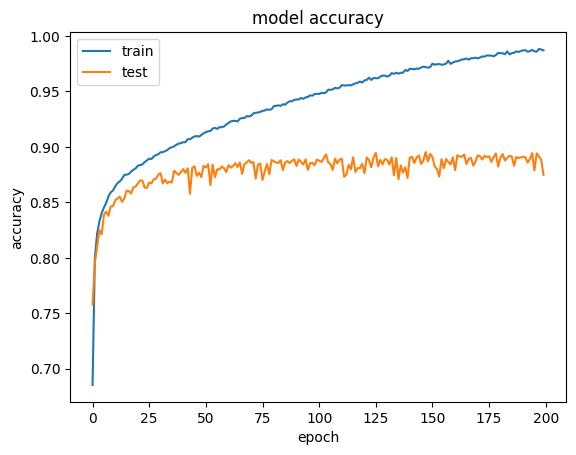

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

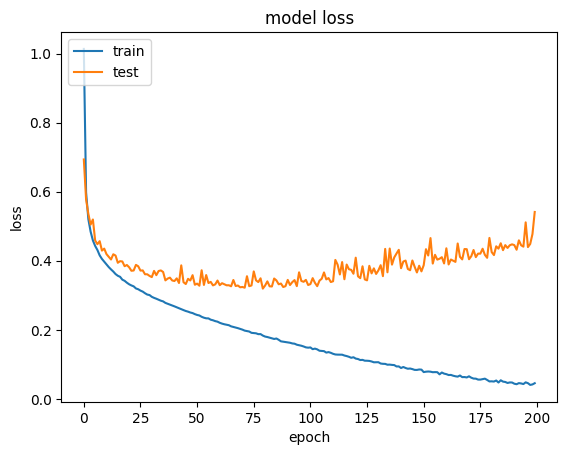

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()